 ### Визуализация промежуточных этапов работы.

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


from cv2 import CascadeClassifier
from PIL import Image
from IPython.display import display, Image, clear_output

%pylab inline

import dlib

In [5]:
# создаем папки
mkdir face_profile
mkdir face_full

In [2]:
def viewImage(image, proba): 
    cv2.namedWindow(proba, cv2.WINDOW_NORMAL)
    cv2.imshow(proba, image)
    cv2.destroyAllWindows()

In [3]:
pictures = os.listdir('data')
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

n = 0
k = 0
while k < len(pictures):
    
    # считываем по порядку все изображения
    image = cv2.imread('data/' + pictures[k])
    image_copy = image.copy()
    
    # переводим в оттенки серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     
    faces = face_detector.detectMultiScale(gray, scaleFactor= 1.2, minNeighbors= 20)
   
    # Добавим столбец в ndarray faces для создания массива с номером фото
    column_to_be_added = np.array([i for i in range(1, len(faces) + 1)])
    faces_result = np.column_stack((faces, column_to_be_added))
    
    for (x, y, w, h, i) in faces_result:
                
        # Вырезаем лица с нужным отступом      
        cropped = image[y-50:y+h+80, x-30:x+w+30]   
        
        # сохраняем фото с выделением лица
        
        cv2.rectangle(image_copy, (x + int(w/2-(h+20)/2), y), (x + int(w/2 + (h+20)/2), y+h+20), (0, 0, 255), 3)   
        cv2.imwrite('face_detect/'+ pictures[k], image_copy)   
        
        # сохраняем обрезанные фотографии
        viewImage(cropped, "full")
        cv2.imwrite('face_full/'+ pictures[k], cropped)   
    
    n += len(faces)
    k += 1

In [4]:
# вывод на экран
def display_im(folder_name, title_name):
    frame = cv2.cvtColor(cv2.imread(folder_name + pictures[1]), cv2.COLOR_BGR2RGB)
    print(title_name)
    plt.figure(figsize=(15,15))
    axis('off')
    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(folder_name + pictures[1]), cv2.COLOR_BGR2RGB), cmap=plt.cm.gist_gray)
    axis('off')
    plt.subplot(1, 5, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(folder_name + pictures[2]), cv2.COLOR_BGR2RGB), cmap=plt.cm.gist_gray)
    axis('off')
    plt.subplot(1, 5, 3)
    plt.imshow(cv2.cvtColor(cv2.imread(folder_name + pictures[3]), cv2.COLOR_BGR2RGB), cmap=plt.cm.gist_gray)
    axis('off')
    plt.subplot(1, 5, 4)
    plt.imshow(cv2.cvtColor(cv2.imread(folder_name + pictures[4]), cv2.COLOR_BGR2RGB), cmap=plt.cm.gist_gray)
    axis('off')
    plt.subplot(1, 5, 5)
    plt.imshow(cv2.cvtColor(cv2.imread(folder_name + pictures[5]), cv2.COLOR_BGR2RGB), cmap=plt.cm.gist_gray)
    axis('off')    

исходные фотографии


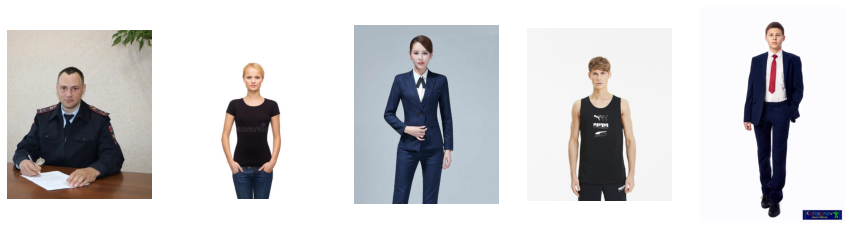

In [5]:
display_im('data/', 'исходные фотографии')

распознование лиц


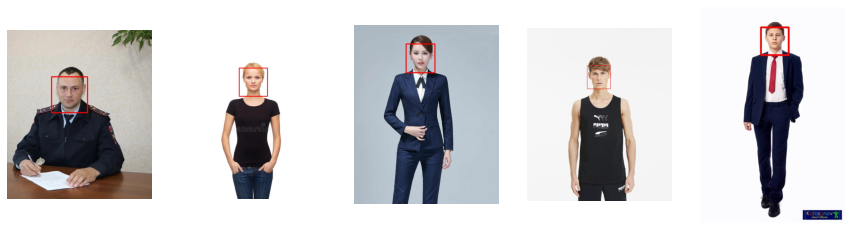

In [6]:
display_im('face_detect/', 'распознование лиц')

обрезка фотографий


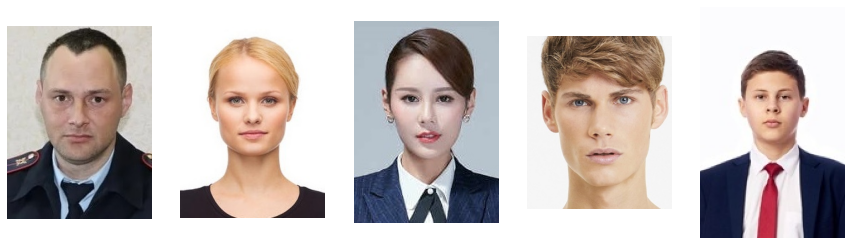

In [7]:
display_im('face_full/', 'обрезка фотографий')

In [10]:
pictures = os.listdir('foto_resized')
image = cv2.imread('foto_resized/' + pictures[0])
img_copy = image.copy()
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 

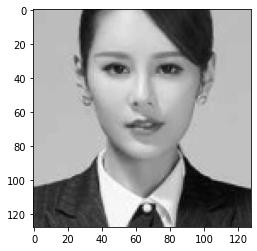

In [11]:
# переводим в оттенки серого
plt.imshow(gray_img, cmap=plt.cm.gist_gray)

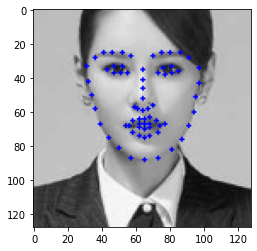

In [13]:
# определяем ключевые точки лица
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
color_img = cv2.cvtColor(gray_img,cv2.COLOR_GRAY2RGB)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")

faces = detector(color_img)

for face in faces:
        
# Получение координат контрольных точек и их построение на изображении
    landmarks = predictor(color_img, face)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(color_img, (x, y), 1, (0, 0, 255), -1)

cv2.imwrite('present/'+ 'points.jpg',color_img)
plt.imshow(color_img, cmap=plt.cm.gist_gray)

2 тип. квадратная форма


True

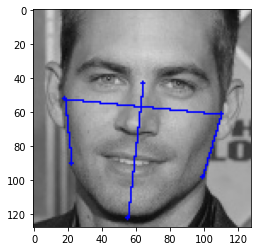

In [18]:
pictures = os.listdir('foto_resized')
image = cv2.imread('foto_resized/' + pictures[13])
img_copy = image.copy()
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")

faces = detector(gray_img)

for face in faces:

        
# Получение координат контрольных точек и их построение на изображении
    landmarks = predictor(gray_img, face)
    
    x_n = landmarks.part(27).x
    y_n = landmarks.part(27).y
    cv2.circle(img_copy, (x_n, y_n), 1, (0, 0, 255), 1)
    
    x_gn = landmarks.part(8).x
    y_gn = landmarks.part(8).y
    cv2.circle(img_copy, (x_gn, y_gn), 1, (0, 0, 255), 1)
    
    cv2.line(img_copy, (x_n, y_n), (x_gn, y_gn), (0, 0, 255), thickness= 1, lineType=1)
    
    
    x_zy1 = landmarks.part(1).x
    y_zy1 = landmarks.part(1).y
    cv2.circle(img_copy, (x_zy1, y_zy1), 1, (0, 0, 255), 1)
    
    x_zy2 = landmarks.part(15).x
    y_zy2 = landmarks.part(15).y
    cv2.circle(img_copy, (x_zy2, y_zy2), 1, (0, 0, 255), 1)

    
    cv2.line(img_copy, (x_zy1, y_zy1), (x_zy2, y_zy2), (0, 0, 255), thickness= 1, lineType=1)
 
    
    x_go_left = landmarks.part(4).x
    y_go_left = landmarks.part(4).y
    
    x_go_right = landmarks.part(12).x
    y_go_right = landmarks.part(12).y
    
    
    for n in range(5, 11):
        if x_go_left > landmarks.part(n).x:
            x_go_left = landmarks.part(n).x
            y_go_left = landmarks.part(n).y
            
        
        if x_go_right < landmarks.part(n).x:
            x_go_right = landmarks.part(n).x
            y_go_right = landmarks.part(n).y    
                
        
    cv2.circle(img_copy, (x_go_left, y_go_left), 1, (0, 0, 255), 1)
    cv2.circle(img_copy, (x_go_right, y_go_right), 1, (0, 0, 255), 1)


    cv2.line(img_copy, (x_zy1, y_zy1), (x_go_left, y_go_left), (0, 0, 255), thickness= 1, lineType=1)
    cv2.line(img_copy, (x_go_right, y_go_right), (x_zy2, y_zy2), (0, 0, 255), thickness= 1, lineType=1)
    
    
# расстояние назион-гнатион
n_gn = math.sqrt((x_n - x_gn)**2 + (y_n - y_gn)**2)

# расстояние зигион-зигион
zy_zy = math.sqrt((x_zy1 - x_zy2)**2 + (y_zy1 - y_zy2)**2)

# определяем насколько конвергируют линии эурион-гонион
k_left = (math.atan((y_zy1 - y_go_left)/(x_zy1-x_go_left))/math.pi)*180
k_right = (math.atan((y_zy2 - y_go_right)/(x_zy2-x_go_right))/math.pi)*180   
angle = 180 - (k_left - k_right)

if angle > 27:
    print ('3 тип. треугольная форма')
elif n_gn - zy_zy < -10:
    print ('2 тип. квадратная форма')
else:
    print ('1 тип. прямоугольная форма')

# Вывод преобразованного изображения

plt.imshow(img_copy, cmap=plt.cm.gist_gray)
cv2.imwrite('present/'+ '13.jpg',img_copy)
